<a href="https://colab.research.google.com/github/j-claudinei-f/j-claudinei-f/blob/main/RegLogis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Decomposição $QR$ de matrizes e aplicações**

José Claudinei Ferreira

Universidade Federal de Alfenas

[Link](https://colab.research.google.com/drive/1HoHRTGj6KgpAon5zsUfSJ7mTjrTNUxyj?usp=sharing) para comentários sobre decomposição QR.

#**Exemplo 2: Problema: Ajuste de Curva Logística** para Crescimento Populacional no Brasil



Adaptado de materia deste link [Link](https://www.ime.unicamp.br/~marcia/AlgebraLinear/problemas_aplicados.html).

A tabela abaixo fornece o número de habitantes no Brasil (em milhões) em alguns anos entre 1920 e 2022:

$$
\begin{array}{|c|ccccccccc|}
\hline
\textbf{Ano ($t$)} & 1920 & 1940 & 1950 & 1960 & 1970 & 1980 & 1991 & 2000 & 2010&2022 \\
\hline
\textbf{Habitantes ($P$)} & 30{,}6 & 41{,}2 & 51{,}9 & 70{,}2 & 93{,}1 & 119{,}0 & 146{,}2 & 169{,}8 & 190{,}7& 203{,}1 \\
\hline
\end{array}
$$

Como podemos prever a população do Brasil em 2030?

Para facilitar os cálculos e reduzir erros de arredondamento, realizamos uma mudança de escala na variável tempo. Tomamos $t=(ano-1920)/11+1$, o que nos dá o vetor $t=(t_1,\,t_2,\,\ldots,t_{11})$.

In [2]:
#@title Colando dados na calculadora. { run: "auto" }
import pandas as pd, numpy as np, matplotlib.pyplot as plt

# Dados do IBGE (milhões de habitantes)
anos = np.array([1920, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2010,2022])
pop = np.array([30.6, 41.2, 51.9, 70.2, 93.1, 119.0, 146.2, 169.8, 190.7,203.1]) # convertendo para habitantes

# Mudança de escala no tempo: t = anos - 1920
t = (anos - 1920)/11+1

# Dados
dados = {
    "Ano": anos,
    "Habitantes (milhões)": pop,
    "t": t
}

# Criação do DataFrame
df = pd.DataFrame(dados)

# Visualização
display(df)

,Ano,Habitantes (milhões),t
0,1920,30.6,1.000000
1,1940,41.2,2.818182
2,1950,51.9,3.727273
3,1960,70.2,4.636364
4,1970,93.1,5.545455
5,1980,119.0,6.454545
6,1991,146.2,7.454545
7,2000,169.8,8.272727
8,2010,190.7,9.181818
9,2022,203.1,10.272727


Uma curva logística é empregada para descrever o processo de crescimento populacional. A expressão analítica dessa curva é:
$$
P(t) = \frac{K}{1 + ae^{-bt}},
$$
onde $K$ é a saturação do processo, ou seja, o limite da população quando $t \to \infty$. Neste exemplo, consideramos $K = 250$ milhões.

Note que essa expressão não é linear nos parâmetros $A$ e $b$. Para resolver isso, aplicamos transformações algébricas:

\begin{align*}
P(t) &= \frac{K}{1 + ae^{-bt}} \\
\Rightarrow \frac{K}{P(t)} &= 1 + ae^{-bt} \\
\Rightarrow \frac{K}{P(t)} - 1 &= ae^{-bt} \\
\Rightarrow \ln\left( \frac{K}{P(t)} - 1 \right) &= \ln(a) - bt.
\end{align*}

Definindo:
\begin{align*}
y &= \ln\left( \frac{K}{P(t)} - 1 \right), \\
x &= t,
\end{align*}
obtemos uma equação linear nos parâmetros:
$$
y = \ln(a) - bt,
$$
isto é, $y = \alpha + \beta x$ com $\alpha = \ln(a)$ e $\beta = -b$.

Os valores de $t$, $P(t)$ e as variáveis transformadas $y$ e $\ln\left( \frac{K}{P} - 1 \right)$ podem ser calculados:

Supondo que os dados obedecem à expressão:
$$
\ln\left( \frac{K}{P(t)} - 1 \right) = \alpha + \beta t,
$$
obtemos um sistema linear da forma matricial $$\begin{bmatrix}1&x_1\\1&x_2\\\vdots&\vdots \\1&x_n\end{bmatrix}\begin{bmatrix}\alpha\\\beta\end{bmatrix} = \begin{bmatrix}y_1\\y_2\\\vdots\\y_n\end{bmatrix},$$ que pode ser resolvido pelo método dos mínimos quadrados para encontrar os parâmetros $\alpha$ e $\beta$.

No caso, vamos usar decomposição $QR$ por meio de projeções ortogonais.

In [3]:
def Proj(x,y):                         # Projeção de x sobre y.
  return (np.dot(x,y)/np.dot(y,y))*y

In [4]:
#@title Ajustando dados do problemas. { run: "auto" }

# Saturação (limite populacional estimado)
K = 250

# Transformações para linearização da curva logística
X = K / pop - 1
Y = np.log(X)
T = t

# Dados adaptados
dados = {
    "Ano": anos,
    "Habitantes (milhões)": pop,
    'K/p(x) - 1': X,
    "y=ln(K/p(x) - 1)": Y,
    "x": T
}

# Criação do DataFrame
df = pd.DataFrame(dados)

# Visualização
display(df)

,Ano,Habitantes (milhões),K/p(x) - 1,y=ln(K/p(x) - 1),x
0,1920,30.6,7.169935,1.969897,1.000000
1,1940,41.2,5.067961,1.622939,2.818182
2,1950,51.9,3.816956,1.339453,3.727273
3,1960,70.2,2.561254,0.940497,4.636364
4,1970,93.1,1.685285,0.521934,5.545455
5,1980,119.0,1.100840,0.096074,6.454545
6,1991,146.2,0.709986,-0.342510,7.454545
7,2000,169.8,0.472320,-0.750098,8.272727
8,2010,190.7,0.310960,-1.168092,9.181818
9,2022,203.1,0.230921,-1.465681,10.272727


Matriz do sistema
      0          1
0  1.0   1.000000
1  1.0   2.818182
2  1.0   3.727273
3  1.0   4.636364
4  1.0   5.545455
5  1.0   6.454545
6  1.0   7.454545
7  1.0   8.272727
8  1.0   9.181818
9  1.0  10.272727
Matriz Q
      0         1
0  1.0 -4.936364
1  1.0 -3.118182
2  1.0 -2.209091
3  1.0 -1.300000
4  1.0 -0.390909
5  1.0  0.518182
6  1.0  1.518182
7  1.0  2.336364
8  1.0  3.245455
9  1.0  4.336364
Matriz R
      0         1
0  1.0  5.936364
1  0.0  1.000000
Matriz [Q^tQ]^{-1}Q^ty
           0
0  0.276441
1 -0.403412
alpha = 2.6712, beta = -0.4034,a = 14.4579, b = 0.4034


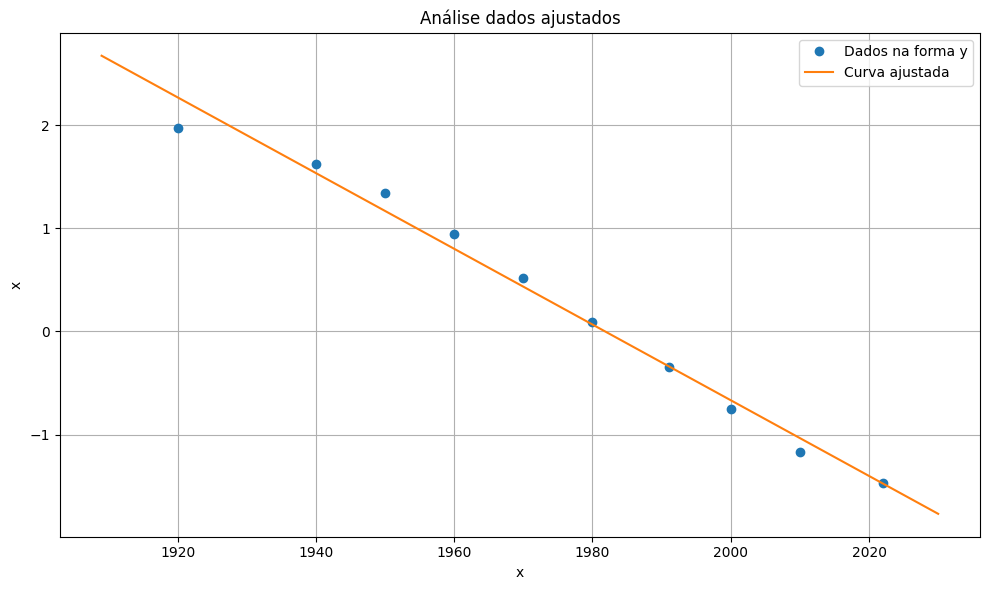

In [5]:
#@title Regressão linear com modelo $Y = \alpha + \beta X$. {run:"auto"}
c2,c1=T, np.ones_like(T)
A = np.vstack([c1,c2]).T

# Criação do DataFrame
df = pd.DataFrame(A)
# Visualização
print('Matriz do sistema\n',df)
q1=c1
q2=c2-Proj(c2,q1)
Q = np.vstack([q1,q2]).T

# Criação do DataFrame
df = pd.DataFrame(Q)
# Visualização
print('Matriz Q\n',df)

R=np.array([[1,np.dot(c2,q1)/np.dot(q1,q1)],[0,1]])
# Criação do DataFrame
df = pd.DataFrame(R)
# Visualização
print('Matriz R\n',df)

Qtb=np.linalg.inv(Q.T@Q)@Q.T@Y
# Criação do DataFrame
df = pd.DataFrame(Qtb)
# Visualização
print('Matriz [Q^tQ]^{-1}Q^ty\n',df)
b = Qtb[1]
a= Qtb[0]-R[0,1]*b
print(f"alpha = {a:.4f}, beta = {b:.4f},a = {np.exp(a):.4f}, b = {-b:.4f}")

# Reescrevendo a curva logística com os parâmetros estimados
def curva_linear(t):
    return a + b*t

# Visualização
t_plot = np.linspace(0,11, 200)  # de 1900 a 2030
anos_plot = 11*(t_plot-1) + 1920

plt.figure(figsize=(10, 6))
plt.plot(anos, Y, 'o', label="Dados na forma y")
plt.plot(anos_plot, curva_linear(t_plot), '-', label="Curva ajustada")
plt.xlabel("x")
plt.ylabel("x")
plt.title("Análise dados ajustados")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


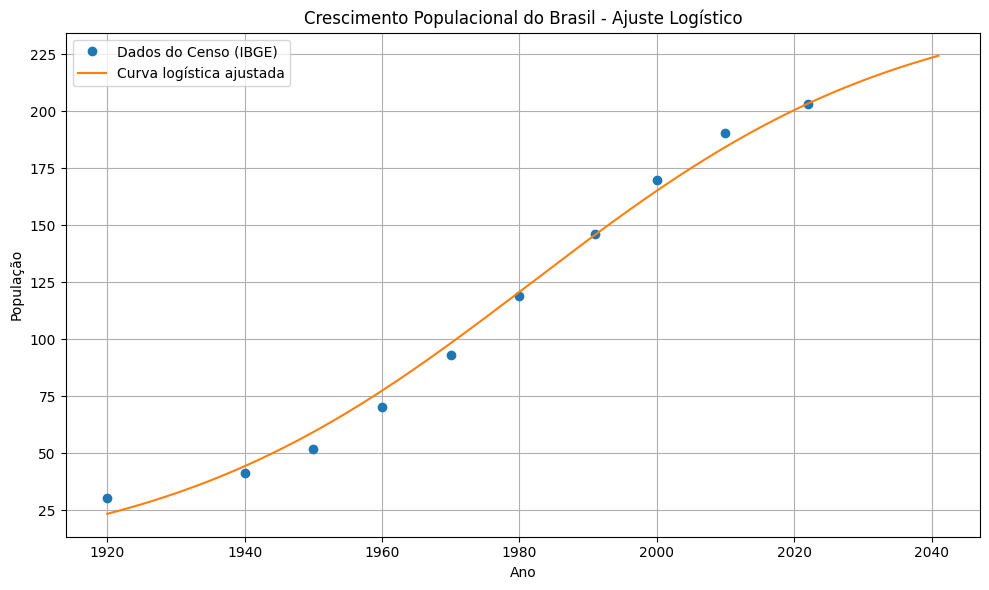

In [6]:
#@title Ajuste dos dados originais {run:"auto"}
def curva_logistica(t):
    return K/(1+np.exp(a + b*t))
# Visualização
t_plot = np.linspace(1, 12, 200)  # de 1900 a 2030
anos_plot = 11*(t_plot-1) + 1920

plt.figure(figsize=(10, 6))
plt.plot(anos,pop, 'o', label="Dados do Censo (IBGE)")
plt.plot(anos_plot, curva_logistica(t_plot), '-', label="Curva logística ajustada")
plt.xlabel("Ano")
plt.ylabel("População")
plt.title("Crescimento Populacional do Brasil - Ajuste Logístico")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

A estimativa da população em 2030 é de:

In [7]:
t2022=(2030 - 1920)/11+1
curva_logistica(t2022)

np.float64(213.4989319146038)

Veja informações sobre o Censo [aqui](https://www.gov.br/planejamento/pt-br/assuntos/noticias/2023/junho/de-2010-a-2022-populacao-brasileira-cresce-6-5-e-chega-a-203-1-milhoes).

#**Estimando o valor de $K$ por meio dos dados** <font color=red> (aqui usa Cálculo)

Como $$
P(t) = \frac{K}{1 + ae^{-bt}}=P(K,a,b,t),
$$ temos que $$\frac{\partial{P}}{\partial K}=\frac{1}{1 + ae^{-bt}}$$ e

$$\frac{\partial{P}}{\partial a}=-\frac{K}{(1 + ae^{-bt})^2}e^{-bt}$$ e
$$\frac{\partial{P}}{\partial b}=\frac{Kat}{(1 + ae^{-bt})^2}e^{-bt}.$$

Seja $$g(K,a,b)=\sum_{i=1}^n\left(P(t_i)-P_i\right)^2.$$ Então $$\nabla g(K,a,b)=2\sum_{i=1}^n\left(P(t_i)-P_i\right)\nabla P(t_i),$$ em que $$\nabla P(t_i)=\left(\frac{\partial{P}}{\partial K},\frac{\partial{P}}{\partial a},\frac{\partial{P}}{\partial b}\right).$$

Resolvendo numericamente a equação doferencial ordinária $$\begin{cases} u'(t)&=&-\nabla g(u(t)\\u(0)=(250,a,b)\end{cases}\tag{*}$$ buscamos uma direção em que $g(u(t))$ decresça e façamos um ajuste ainda melhor

In [8]:
#@title Definição das funções. {run:"auto"}
import numpy as np

def P(s,u):
  K,a,b=u[0],u[1],u[2]
  return K/(1+a*np.exp(-b*s))

def Grad_P(s,u):
  K,a,b=u[0],u[1],u[2]
  p=np.array([1/(1+a*np.exp(-b*s)),-K*np.exp(-b*s)/((1+a*np.exp(-b*s))**2),K*a*s*np.exp(-b*s)/((1+a*np.exp(-b*s))**2)])
  return p

def g(u):
  K,a,b=u[0],u[1],u[2]
  p=np.array([P(t[i],u)-pop[i] for i in range(len(pop))])
  return np.sum(p**2)

def Grad_g(u):
  K,a,b=u[0],u[1],u[2]
  p=np.array([(P(t[i],u)-pop[i])*Grad_P(t[i],u) for i in range(len(pop))])
  return np.sum(p)


In [9]:
e0=np.array([250,np.exp(2.6712),0.4034]) # Valor obtido pela linearização.
Grad_g(e0)                               # Valor do gradiente de g(u) no ponto inciail.

np.float64(572.4373635116604)

In [10]:
#@title Método de Euler para resolver a equação (*) {run:"auto"}
# --------------------------- Método de Euler acelerado-b


t0=0  # tempo inicial
tf=1  # t final ????
n=1000000
h=tf/n   # Tamanho do passo ????

tt=np.linspace(t0,tf,n)

U=[e0]

for i in range(0, n-1):
  U.append(U[i]-h*Grad_g(U[i]))

usol=U[-1] # Solução aproximada

U0=np.transpose(U)

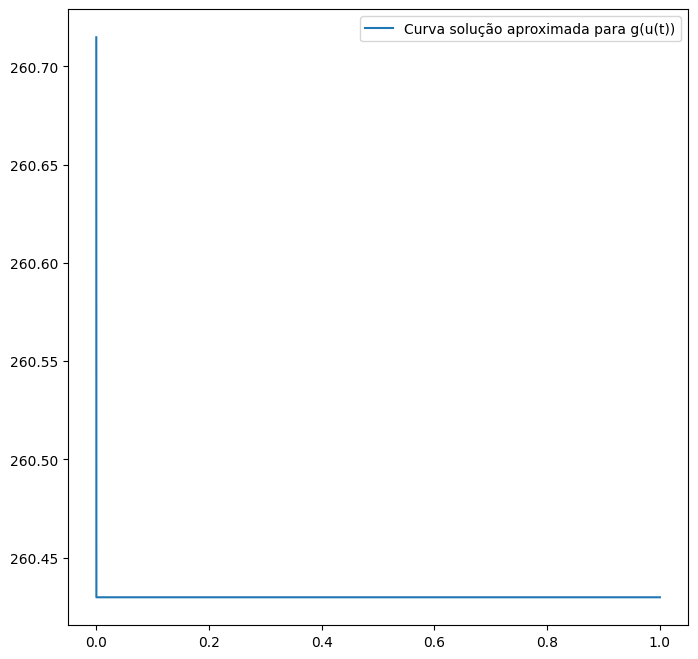

In [11]:
#@title Decaimento de $g(u(t))$. {run:"auto"}

fig = plt.figure(figsize=(8,8))
plt.plot(tt,[g(u) for u in U],label='Curva solução aproximada para g(u(t))')  #Cria o gráfico para verificar minimização.
plt.legend()#Mostra a legenda do gráfico
plt.show() #Mostra o gráfico

In [12]:
g(U[-1])  # último valor estimado de g(u(t)).

np.float64(260.4298820180498)

K = 249.9995,a = 14.4568, b = 0.4029


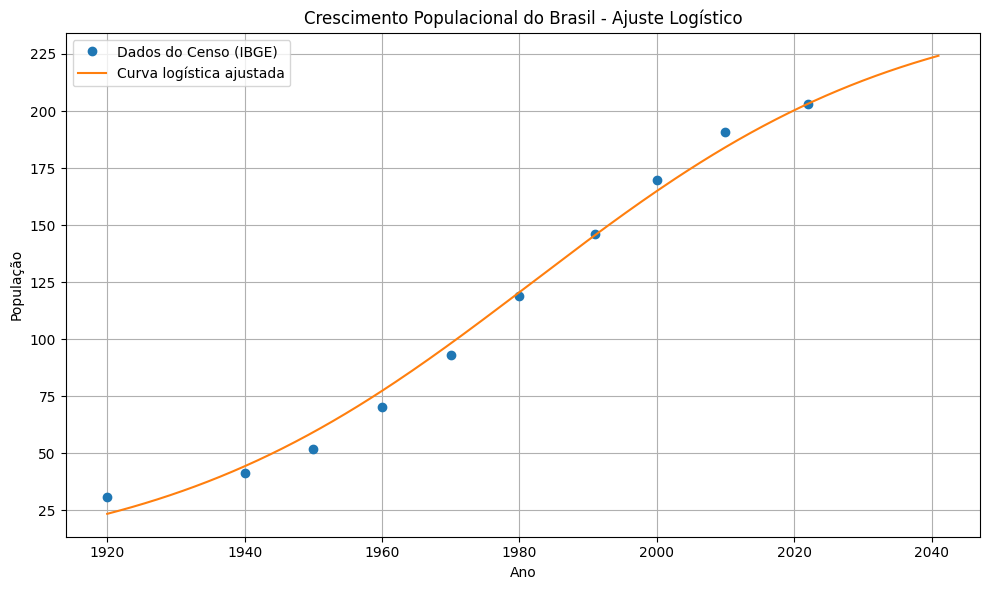

In [13]:
#@title Ajuste atualizado. {run:"auto"}
K,a,b=usol[0],usol[1],usol[2]
print(f"K = {K:.4f},a = {a:.4f}, b = {b:.4f}")

# Reescrevendo a curva logística com os parâmetros estimados
def curva2_logistica(t):
    return K/(1+a*np.exp(-b*t))
# Visualização
t_plot = np.linspace(1, 12, 200)  # de 1900 a 2030
anos_plot = 11*(t_plot-1) + 1920

plt.figure(figsize=(10, 6))
plt.plot(anos,pop, 'o', label="Dados do Censo (IBGE)")
plt.plot(anos_plot, curva2_logistica(t_plot), '-', label="Curva logística ajustada")
plt.xlabel("Ano")
plt.ylabel("População")
plt.title("Crescimento Populacional do Brasil - Ajuste Logístico")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()